In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)

from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

housing.csv



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
housing_df = pd.read_csv('../input/housing.csv')
housing_df.head()
housing_df = housing_df.drop('ocean_proximity',axis=1)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
print('Shape :',housing_df.shape)
print('Features Data types : \n',housing_df.dtypes)
print('checking if any null values')
print(housing_df.isnull().sum())     

Shape : (20640, 9)
Features Data types : 
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object
checking if any null values
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [4]:
# Null values in total_bedrooms so we will drop them, Its best practice to replace any null values with mean/median.
housing_df = housing_df.dropna(axis=0)
housing_df.shape

(20433, 9)

#### Our taget variable is median_house value, and so all the other columns are features. Now split the data into X and y variables where X considered as features and y target variable

In [5]:
X = housing_df.drop(['median_house_value'],axis=1)
y = housing_df['median_house_value']
print(X.shape,y.shape)

(20433, 8) (20433,)


In [6]:
reg = linear_model.LinearRegression()

*Split the data into train and test tests*

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [8]:
print(X_train.shape)
print(X_test.shape)

(16346, 8)
(4087, 8)


In [9]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
pred = reg.predict(X_test)


In [11]:
print('Predicted Value :',pred[0])
print('Actual Value :',Y_test.values[0])

Predicted Value : 133016.436387
Actual Value : 74800.0


In [12]:
res = pd.DataFrame({'Predicted':pred,'Actual':Y_test})
res = res.reset_index()
res = res.drop(['index'],axis=1)


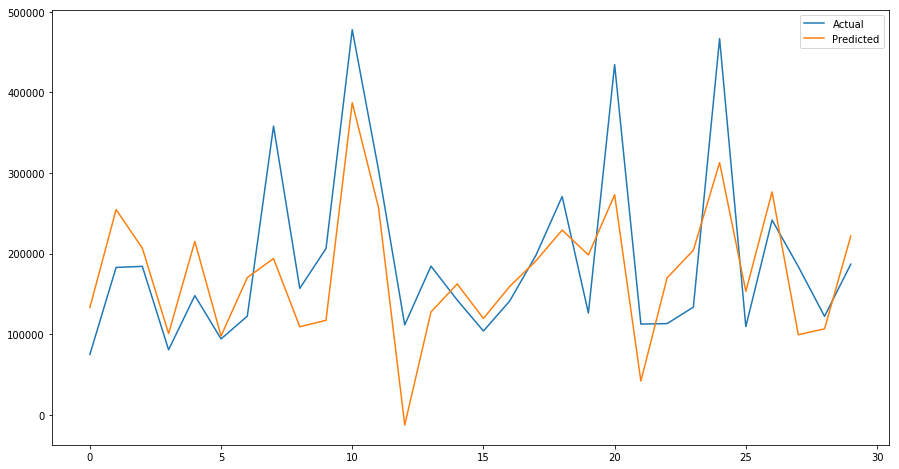

In [13]:
plt.plot(res[:30])
plt.legend(['Actual','Predicted'])

In [14]:
res

,Actual,Predicted
0,74800.0,133016.436387
1,182800.0,254562.692358
2,184100.0,206702.234551
3,80600.0,100660.592889
4,147800.0,215051.068620
5,94100.0,97760.502347
6,122300.0,170218.307901
7,358100.0,193798.020263
8,156800.0,109172.894729
9,206300.0,117183.946205


In [15]:
#you can save the model and predict with single array values as below
# 'a' represent the list of features we have to predict the value of the house
a = [ -122.23,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014]
reg.predict(np.array(a).reshape([1,-1]))

array([ 415489.25131451])